In [75]:
import pandas as pd
from sklearn.inspection import permutation_importance
import numpy as np
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import ElasticNetCV,RidgeClassifierCV, ElasticNet, Lasso, SGDClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import os

In [76]:
random_num = 1
data = os.path.join("归一化后的数据", "归一化后的数据（十七支队）.xlsx")
data_test = os.path.join("归一化后的数据", "归一化后的数据（十七支队）.xlsx")

# 载入数据集
excelFile = data
dataset = pd.DataFrame(pd.read_excel(excelFile,sheet_name="训练集"))  #development
x_train = dataset[dataset.columns[1:]]
y_train = dataset[['Group']].values.ravel()
excelFile_test = data_test
dataset_test_1 = pd.DataFrame(pd.read_excel(excelFile_test, sheet_name="留出集")) #external_test_2
x_test_1 = dataset_test_1[dataset_test_1.columns[1:]]
y_test_1 = dataset_test_1[['Group']].values.ravel()
dataset_test_2 = pd.DataFrame(pd.read_excel(excelFile_test, sheet_name="西溪验证集")) #external_val
x_test_2 = dataset_test_2[dataset_test_2.columns[1:]]
y_test_2 = dataset_test_2[['Group']].values.ravel()
dataset_test_3 = pd.DataFrame(pd.read_excel(excelFile_test, sheet_name="浙一验证集")) #external_test_1
x_test_3 = dataset_test_3[dataset_test_3.columns[1:]]
y_test_3 = dataset_test_3[['Group']].values.ravel()

dataset_test_5 = pd.DataFrame(pd.read_excel(excelFile_test, sheet_name="全体数据集without训练集")) #total_wo_development
x_test_5 = dataset_test_5[dataset_test_5.columns[1:]]
y_test_5 = dataset_test_5[['Group']].values.ravel()

## 模型训练

In [127]:
#模型选择
print('[1]ensemble\n[2]tree\n[3]linear\n[4]svm\n[5]bayes\n[6]logistic\n[7]neural network\n[8]neighbor')
leixing = input('请选择类型：')
if leixing == '1':
    print('[a]AdaBoost\n[b]RandomForest\n[c]GradientBoosting\n[d]ExtraTree\n[e]XGBoost')
    model_all = {'a':'AdaBoostClassifier(algorithm="SAMME", learning_rate=0.14999999999999999, random_state=1)',
                 'b':'RandomForestClassifier(criterion= "entropy", max_depth=9, max_features=0.2, n_estimators=97,random_state=1)',
                 'c':'GradientBoostingClassifier(learning_rate=0.09, max_depth=4, max_features=0.06999999999999999, n_estimators=90, subsample=0.7999999999999999, random_state=1)',
                 'd':'ExtraTreesClassifier(criterion="gini", max_depth=12, max_features=0.06999999999999999,n_estimators=64, random_state=1)'}
                 #'e':'XGBClassifier(max_depth=1,random_state=1,seed = 1)'}
elif leixing == '2':
    print('[a]DecisionTree\n[b]ExtraTree')
    model_all = {'a':'DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=3, max_features=3,random_state=1)',  #修改为非线性边界
                 'b':'ExtraTreeClassifier(criterion="entropy", max_depth=4, max_features=3,splitter="best",random_state=1)'}
elif leixing == '3':
    print('[a]ElasticNet\n[b]LASSO\n[c]Ridge\n[d]SDG\n[e]感知机\n[f]PAC')
    model_all = {#'a': 'ElasticNetCV(random_state = random_num)', 
                 #'b': 'LassoCV(random_state = random_num)',
                'c':'RidgeClassifierCV(alphas=38.1, fit_intercept=True)',#这个模型不能设置随机数种子
                'd':'SGDClassifier(alpha=0.060000000000000005, fit_intercept=True, l1_ratio=0.4, learning_rate="optimal", loss="modified_huber", penalty="elasticnet", random_state=1)',
                'e':'Perceptron(alpha=5.099999999999999e-05, fit_intercept=True, penalty="l2",random_state=1)',
                'f':'PassiveAggressiveClassifier(C=0.007, fit_intercept=True, random_state = 1)'}
elif leixing == '4':
    print('[a]LinearSVC\n[b]SVC\n[c]LDA')
    model_all = {'a': 'LinearSVC(C=0.15000000000000002, dual=False, penalty="l1", random_state=1)',
                 'b': 'SVC(C=113, gamma=0.0009000000000000001, kernel="rbf", random_state=1)'}
                 #'c':'LinearDiscriminantAnalysis(shrinkage="auto", solver="lsqr")'}
elif leixing == '5':
    print('[a]BernoulliNB')
    model_all = {'a':'BernoulliNB(alpha=1.0101010101010102, binarize=0.30303030303030304, class_prior=None, fit_prior=True)'}#这个模型不能设置随机数种子
    
model_want = input('请选择模型:')
model_out = model_all.get(model_want)
print("model_out:",model_out)

model =eval(model_out)

model.fit(x_train, y_train)
scores = cross_val_score(model, x_train, y_train, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10), n_jobs=-1, scoring='roc_auc', verbose=0)
print('五折train_AUC:', scores.mean())
scores_acc = cross_val_score(model, x_train, y_train, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10), n_jobs=-1, scoring='accuracy', verbose=0)
print('五折train_ACC:', scores_acc.mean())

if leixing == '3' or leixing == '4':
    y_pred = model.decision_function(x_train)
    y_pred_1 = model.decision_function(x_test_1)
    y_pred_2 = model.decision_function(x_test_2)
    y_pred_3 = model.decision_function(x_test_3)
    y_pred_5 = model.decision_function(x_test_5)

else:    
    y_pred = model.predict_proba(x_train)[:, 1]
    y_pred_1 = model.predict_proba(x_test_1)[:, 1]
    y_pred_2 = model.predict_proba(x_test_2)[:, 1]
    y_pred_3 = model.predict_proba(x_test_3)[:, 1]
    y_pred_5 = model.predict_proba(x_test_5)[:, 1]

auc_train = roc_auc_score(y_train, y_pred)
auc_1 = roc_auc_score(y_test_1, y_pred_1)
auc_2 = roc_auc_score(y_test_2, y_pred_2)
auc_3 = roc_auc_score(y_test_3, y_pred_3)
auc_5 = roc_auc_score(y_test_5, y_pred_5)


print('训练集AUC:', auc_train)
print('留出集AUC:', auc_1)
print('西溪验证集AUC:', auc_2)
print('浙一验证集AUC:', auc_3)
print('全体数据集without训练集AUC:', auc_5)


acc_train = accuracy_score(y_train, model.predict(x_train))
acc_1 = accuracy_score(y_test_1, model.predict(x_test_1))
acc_2 = accuracy_score(y_test_2, model.predict(x_test_2))
acc_3 = accuracy_score(y_test_3, model.predict(x_test_3))
acc_5 = accuracy_score(y_test_5, model.predict(x_test_5))


print('训练集ACC:', acc_train)
print('留出集ACC:', acc_1)
print('西溪验证集ACC:', acc_2)
print('浙一验证集ACC:', acc_3)
print('全体数据集without训练集ACC:', acc_5)

[1]ensemble
[2]tree
[3]linear
[4]svm
[5]bayes
[6]logistic
[7]neural network
[8]neighbor
[a]BernoulliNB
model_out: BernoulliNB(alpha=1.0101010101010102, binarize=0.30303030303030304, class_prior=None, fit_prior=True)
五折train_AUC: 0.9279280704529874
五折train_ACC: 0.8600297619047618
训练集AUC: 0.9377892488430046
留出集AUC: 0.9550000000000001
西溪验证集AUC: 0.8233333333333334
浙一验证集AUC: 0.8771121351766512
全体数据集without训练集AUC: 0.869969040247678
训练集ACC: 0.8773584905660378
留出集ACC: 0.9111111111111111
西溪验证集ACC: 0.7551020408163265
浙一验证集ACC: 0.7884615384615384
全体数据集without训练集ACC: 0.815068493150685


## 决策边界

In [11]:
from sklearn.decomposition import PCA  

In [12]:
# 合并两个数据集
X_high_dim_combined = np.vstack([x_train, x_test_3])
y_true_combined = np.hstack([y_train, y_test_3])

# 1. 使用PCA进行降维
pca = PCA(n_components=2)  # 创建PCA对象，将数据降到2维
X_low_dim_combined = pca.fit_transform(X_high_dim_combined)  # 使用PCA将高维数据降到2维

# 分别获取两个数据集在降维空间中的坐标
X_low_dim1 = pd.DataFrame(X_low_dim_combined[:len(x_train)])
X_low_dim2 = pd.DataFrame(X_low_dim_combined[len(x_train):])



In [13]:
# 创建标签的函数
def label_data(dataset_name, labels):
    return [f"{dataset_name}-{label}" for label in labels]

# 为两个数据集创建新的标签
train_labels = label_data("train", y_train)
zheyi_labels = label_data("zheyi", y_test_3)

# 合并两个数据集的标签
combined_labels = train_labels + zheyi_labels

# 创建 Pandas DataFrame
#df_labels = pd.DataFrame({"Labels": combined_labels})

df_combined = pd.DataFrame(X_low_dim_combined, columns=["x", "y"])

# 添加标签列
df_combined["labels"] = combined_labels

df_combined.to_excel("pca降维.xlsx", index=False)

/home/louhao/.conda/envs/mnf/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/tmp/ipykernel_3724202/711239736.py:41: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_zheyi_0 = plt.scatter(X_low_dim2.iloc[y_test_3 == 0, 0],
/tmp/ipykernel_3724202/711239736.py:45: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_zheyi_1 = plt.scatter(X_low_dim2.iloc[y_test_3 == 1, 0],


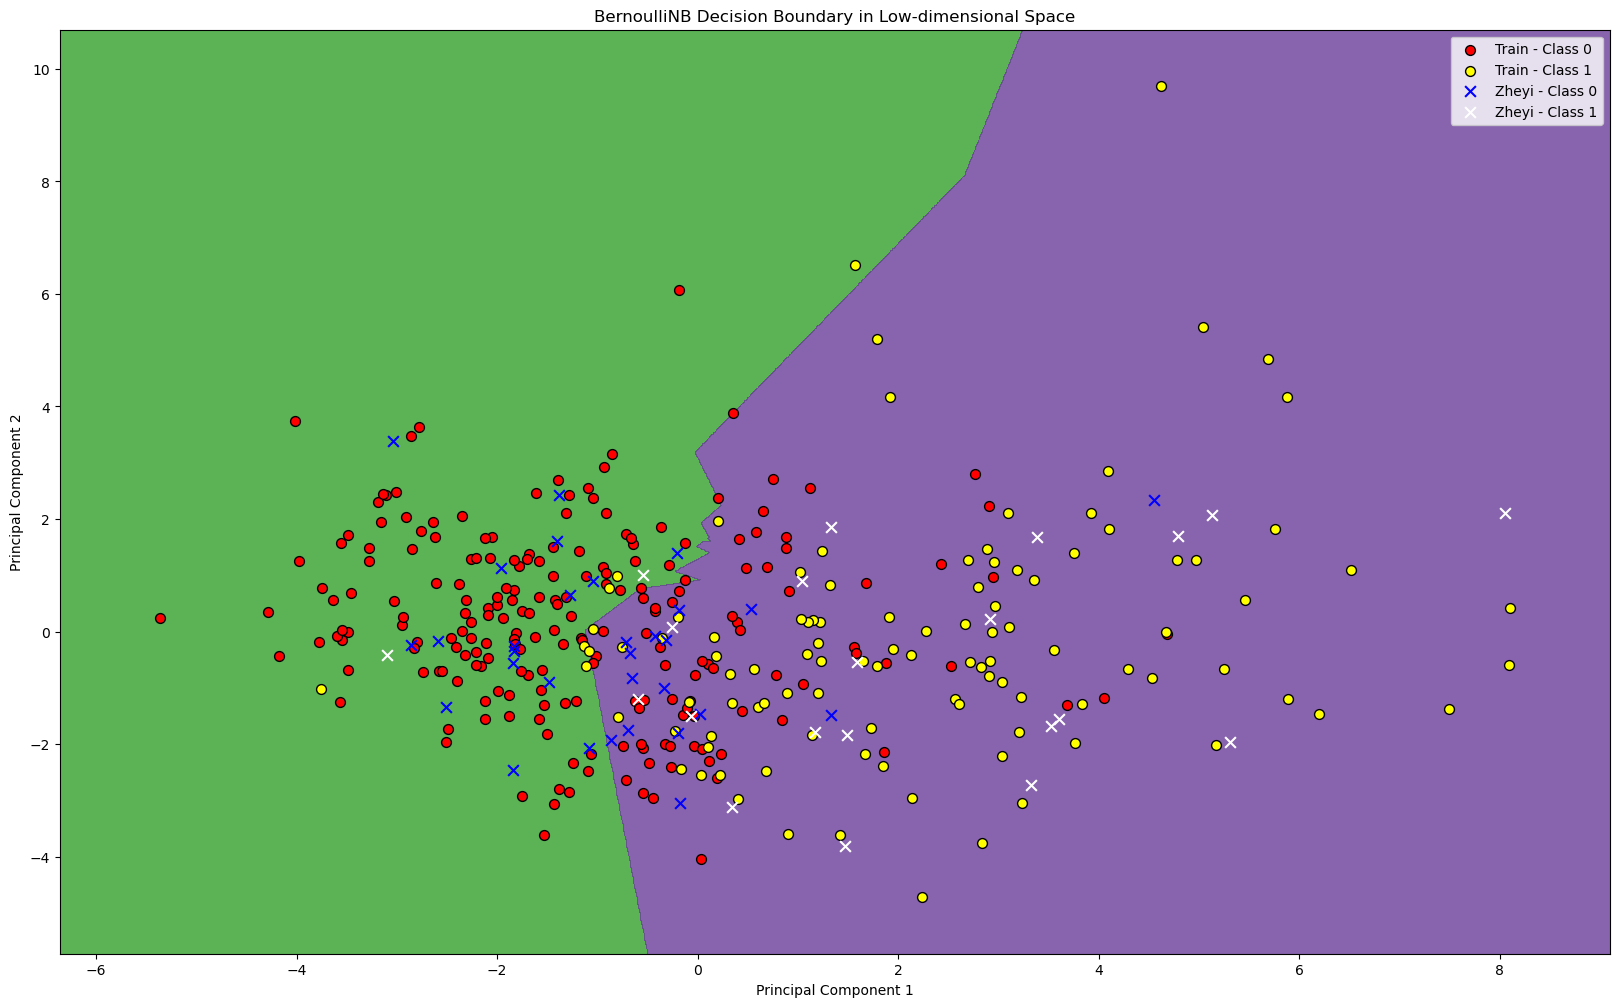

In [51]:

# 2. 确定网格范围
margin = 1  # 设置边距大小，确保图形边界外留出一定空白
x_min, x_max = X_low_dim_combined[:, 0].min() - margin, X_low_dim_combined[:, 0].max() + margin  # 计算第一主成分的最小和最大值，并加上边距
y_min, y_max = X_low_dim_combined[:, 1].min() - margin, X_low_dim_combined[:, 1].max() + margin  # 计算第二主成分的最小和最大值，并加上边距

# 3. 创建低维网格点
grid_size = 2000  # 设置网格密度，即在每个维度上生成2000个网格点
xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size),
                     np.linspace(y_min, y_max, grid_size))  # 生成x和y轴上的网格点
grid_points_low_dim = np.c_[xx.ravel(), yy.ravel()]  # 将网格点展平成二维数组，用于后续计算

# 4. 逆映射网格点至高维空间
grid_points_high_dim = pca.inverse_transform(grid_points_low_dim)  # 使用PCA的逆变换将低维网格点映射回高维空间

# 5. 模型预测
predictions = model.predict(grid_points_high_dim)  # 使用训练好的模型对高维空间中的网格点进行分类预测
Z = predictions.reshape(xx.shape)  # 将预测结果reshape为与网格形状相同，以便后续绘图

# 6. 绘制决策边界
num_classes = len(np.unique(y_true_combined))  # 获取数据集中类别的数量
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, Z, levels=np.arange(num_classes + 1) - 0.5, cmap=plt.cm.Paired, alpha=0.8)  


# 使用contourf绘制决策边界，采用不同颜色填充每个类别的区域
# 绘制原始数据点
# 定义颜色，分别对应类别 0 和 1
colors_train = ['red', 'yellow']  # 训练集类别 0 用红色，类别 1 用蓝色
colors_zheyi = ['blue', 'white']  # 验证集类别 0 用绿色，类别 1 用紫色

# 绘制训练集类别 0 和 1
scatter_train_0 = plt.scatter(X_low_dim1.iloc[y_train == 0, 0],
                              X_low_dim1.iloc[y_train == 0, 1],
                              color=colors_train[0], edgecolor='k', s=50, label='Train - Class 0')  # 点的大小 s=20

scatter_train_1 = plt.scatter(X_low_dim1.iloc[y_train == 1, 0],
                              X_low_dim1.iloc[y_train == 1, 1],
                              color=colors_train[1], edgecolor='k', s=50, label='Train - Class 1')

# 绘制验证集类别 0 和 1
scatter_zheyi_0 = plt.scatter(X_low_dim2.iloc[y_test_3 == 0, 0],
                              X_low_dim2.iloc[y_test_3 == 0, 1],
                              color=colors_zheyi[0], edgecolor='k', marker='x', s=60, label='Zheyi - Class 0')

scatter_zheyi_1 = plt.scatter(X_low_dim2.iloc[y_test_3 == 1, 0],
                              X_low_dim2.iloc[y_test_3 == 1, 1],
                              color=colors_zheyi[1], edgecolor='k', marker='x', s=60, label='Zheyi - Class 1')



#plt.scatter(df_boundary_points['x'], df_boundary_points['y'], color='blue', label='Points')

# 绘制降维后的数据点，使用不同颜色表示不同类别
# 添加图形元素
plt.xlabel('Principal Component 1')  # 设置x轴标签为"第一主成分"
plt.ylabel('Principal Component 2')  # 设置y轴标签为"第二主成分"

model_name = type(model).__name__  # 获取模型类名
plt.title(f'{model_name} Decision Boundary in Low-dimensional Space')  # 设置图形标题为"低维空间中的决策边界"
plt.legend()  # 确保图例显示

save_dir = "决策边界图片（十七支队）"
if not os.path.exists(save_dir):  # 如果目录不存在，则创建
    os.makedirs(save_dir)

# 保存图像
plt.savefig(os.path.join(save_dir, f'{model_name}_decision_boundary.png'), dpi=300)  # 保存图像

plt.show()  # 显示绘制的图形


### 决策边界坐标输出

/tmp/ipykernel_3724202/1397603829.py:30: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_low_dim2.iloc[y_test_3 == 0, 0], X_low_dim2.iloc[y_test_3 == 0, 1],
/tmp/ipykernel_3724202/1397603829.py:32: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_low_dim2.iloc[y_test_3 == 1, 0], X_low_dim2.iloc[y_test_3 == 1, 1],


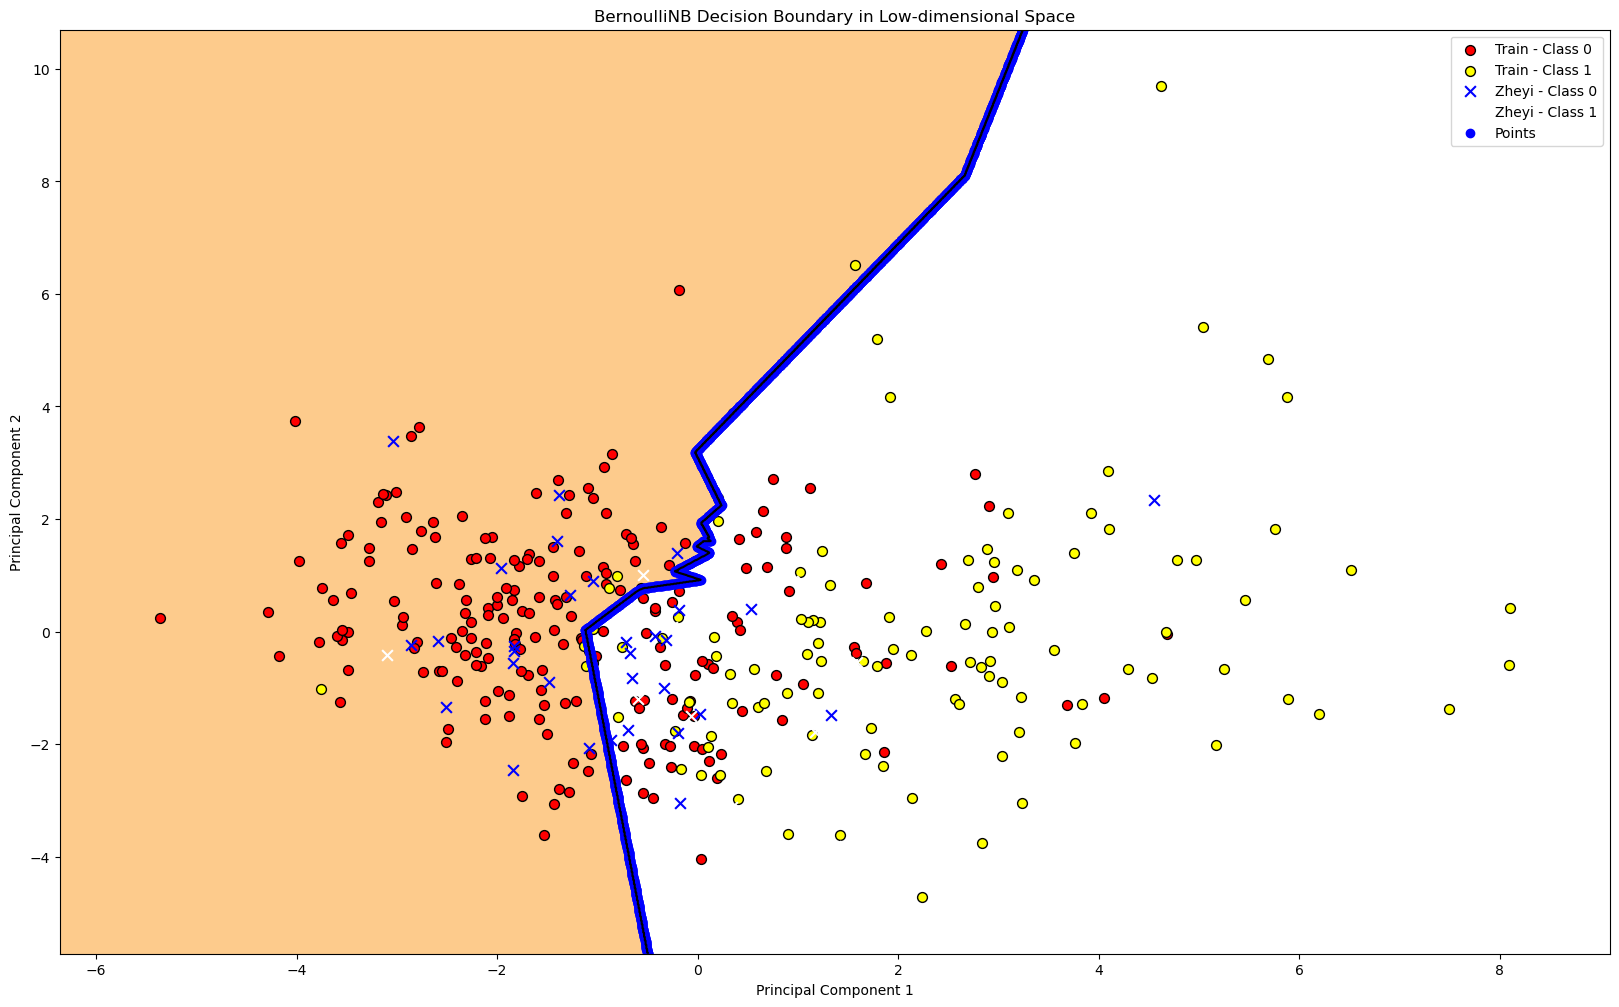

             x          y
0     3.247139  10.695898
1     3.243272  10.691791
2     3.239405  10.687683
3     3.239405  10.679468
4     3.239405  10.671252
...        ...        ...
2835 -0.504029  -5.701877
2836 -0.500162  -5.705984
2837 -0.496294  -5.710092
2838 -0.496294  -5.718307
2839 -0.496294  -5.726522

[2840 rows x 2 columns]


In [52]:
#predictions = model.predict(grid_points_high_dim)  # 使用训练好的模型对高维空间中的网格点进行分类预测
#Z = predictions.reshape(xx.shape)  # 将预测结果reshape为与网格形状相同，以便后续绘图

# 使用 contour 而不是 contourf 绘制决策边界，并获取 QuadContourSet 对象
plt.figure(figsize=(20, 12))
contour = plt.contour(xx, yy, Z, levels=[0.5], colors='black')  # 使用 levels=[0.5] 来绘制类别 0 和类别 1 的边界线

# 提取决策边界的坐标点
boundary_points = []

# 遍历每条边界线
for collection in contour.collections:
    for path in collection.get_paths():
        boundary_points.append(path.vertices)

# 将所有边界线的坐标点合并
boundary_points = np.concatenate(boundary_points, axis=0)

# 创建 DataFrame 来存储决策边界的点
df_boundary_points = pd.DataFrame(boundary_points, columns=['x', 'y'])

# 绘制原始图像
plt.contourf(xx, yy, Z, levels=np.arange(len(np.unique(Z))) - 0.5, cmap=plt.cm.Paired, alpha=0.8)

# 绘制数据点（原始数据）
plt.scatter(X_low_dim1.iloc[y_train == 0, 0], X_low_dim1.iloc[y_train == 0, 1],
            color='red', edgecolor='k', s=50, label='Train - Class 0')
plt.scatter(X_low_dim1.iloc[y_train == 1, 0], X_low_dim1.iloc[y_train == 1, 1],
            color='yellow', edgecolor='k', s=50, label='Train - Class 1')
plt.scatter(X_low_dim2.iloc[y_test_3 == 0, 0], X_low_dim2.iloc[y_test_3 == 0, 1],
            color='blue', edgecolor='k', marker='x', s=60, label='Zheyi - Class 0')
plt.scatter(X_low_dim2.iloc[y_test_3 == 1, 0], X_low_dim2.iloc[y_test_3 == 1, 1],
            color='white', edgecolor='k', marker='x', s=60, label='Zheyi - Class 1')

plt.scatter(df_boundary_points['x'], df_boundary_points['y'], color='blue', label='Points')
#plt.plot(df_boundary_points['x'], df_boundary_points['y'], color='red', linestyle='-', label='Line')

# 设置图例和标签
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Scatter Plot with Connected Points')
plt.grid()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'{model_name} Decision Boundary in Low-dimensional Space')
plt.legend()
plt.grid()

#plt.savefig(f'决策边界（十七支队）/{model_name}_decision_boundary.png', dpi=300)
plt.show()

# 输出决策边界坐标点的 DataFrame
print(df_boundary_points)
model_name = type(model).__name__  # 获取模型类名
df_boundary_points.to_csv(f'决策边界坐标（十七支队）/{model_name}_decision_boundary.csv', index=False)

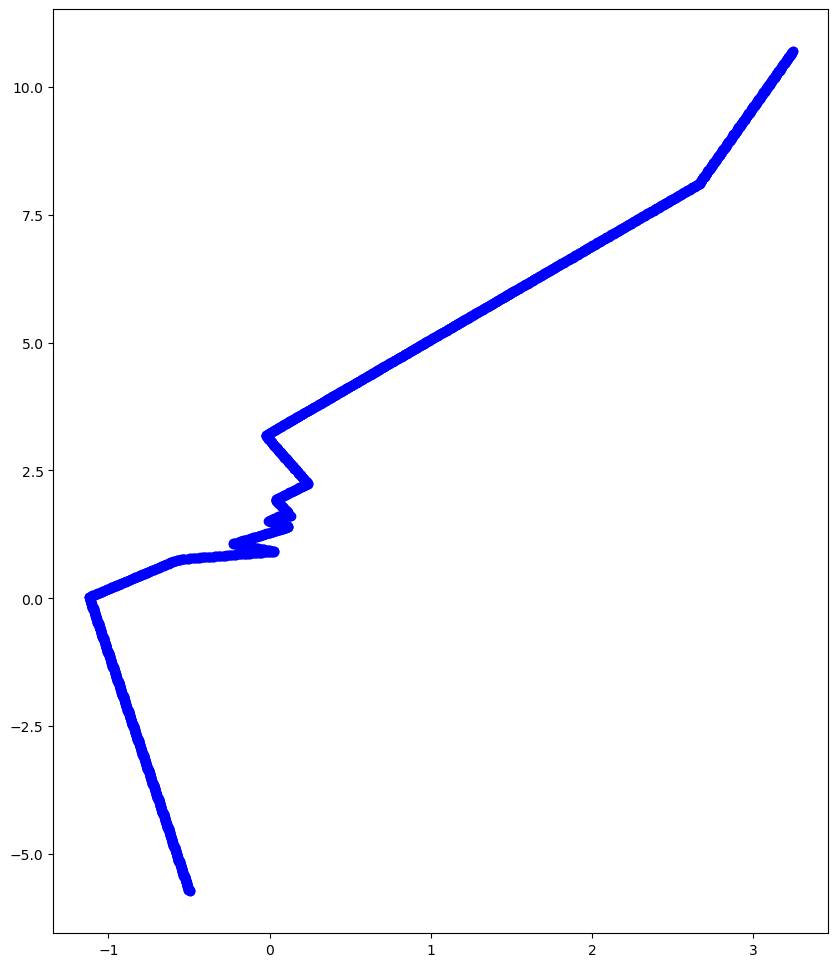

In [53]:
plt.figure(figsize=(10, 12))
plt.scatter(df_boundary_points['x'], df_boundary_points['y'], color='blue', label='Points')

In [54]:
x_max, x_min, y_max, y_min

(9.09818827969423, -6.362812020284772, 10.69589831652709, -5.726522476474858)

## 输出预测标签

In [48]:
# 预测每个样本的标签（0或1）
y_pred_train_labels = model.predict(x_train)
y_pred_test_1_labels = model.predict(x_test_1) #留出：external_test_2
y_pred_test_2_labels = model.predict(x_test_2) # 西溪：external_val
y_pred_test_3_labels = model.predict(x_test_3) # 浙一：external_test_1
y_pred_test_5_labels = model.predict(x_test_5) #全体without训练集：total_wo

In [49]:
# 创建一个新的 Excel 文件，并将每个预测结果保存到不同的 sheet 中
with pd.ExcelWriter('./十七支队预测labels/BernoulliNB.xlsx') as writer:
    # 保存训练集预测结果
    pd.DataFrame(y_pred_train_labels, columns=['development']).to_excel(writer, sheet_name='development', index=False)
    
    # 保存留出集预测结果
    pd.DataFrame(y_pred_test_1_labels, columns=['external_test_2']).to_excel(writer, sheet_name='external_test_2', index=False)
    
    # 保存西溪验证集预测结果
    pd.DataFrame(y_pred_test_2_labels, columns=['external_val']).to_excel(writer, sheet_name='external_val', index=False)
    
    # 保存浙一验证集预测结果
    pd.DataFrame(y_pred_test_3_labels, columns=['external_test_1']).to_excel(writer, sheet_name='external_test_1', index=False)
    
    # 保存全体数据集without训练集预测结果
    pd.DataFrame(y_pred_test_5_labels, columns=['total_wo_development']).to_excel(writer, sheet_name='total_wo_development', index=False)

print("预测结果已保存")


预测结果已保存


/tmp/ipykernel_87073/1143339022.py:44: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_low_dim2[:, 0], X_low_dim2[:, 1], c=y_test_3, marker='x', edgecolor='k',


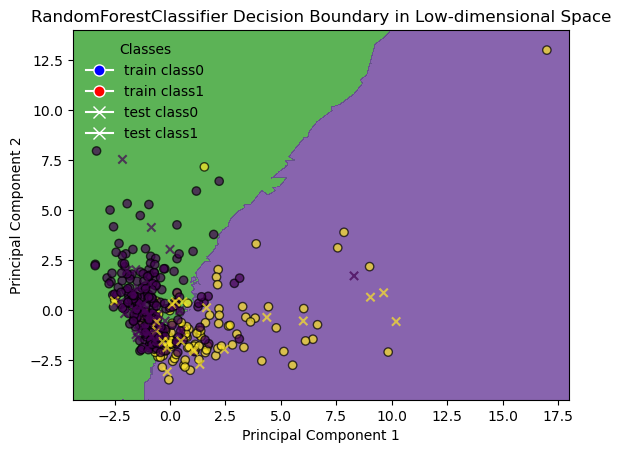

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from matplotlib.lines import Line2D

# 合并两个数据集
X_high_dim_combined = np.vstack([x_train, x_test_3])
y_true_combined = np.hstack([y_train, y_test_3])

# 1. 使用PCA进行降维
pca = PCA(n_components=2)
X_low_dim_combined = pca.fit_transform(X_high_dim_combined)

# 分别获取两个数据集在降维空间中的坐标
X_low_dim1 = X_low_dim_combined[:len(x_train)]
X_low_dim2 = X_low_dim_combined[len(x_train):]

# 2. 确定网格范围
margin = 1
x_min, x_max = X_low_dim_combined[:, 0].min() - margin, X_low_dim_combined[:, 0].max() + margin
y_min, y_max = X_low_dim_combined[:, 1].min() - margin, X_low_dim_combined[:, 1].max() + margin

# 3. 创建低维网格点
grid_size = 2000
xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size),
                     np.linspace(y_min, y_max, grid_size))
grid_points_low_dim = np.c_[xx.ravel(), yy.ravel()]

# 4. 逆映射网格点至高维空间
grid_points_high_dim = pca.inverse_transform(grid_points_low_dim)

# 5. 模型预测
predictions = model.predict(grid_points_high_dim)
Z = predictions.reshape(xx.shape)

# 6. 绘制决策边界
num_classes = len(np.unique(y_true_combined))
plt.contourf(xx, yy, Z, levels=np.arange(num_classes + 1) - 0.5, cmap=plt.cm.Paired, alpha=0.8)

# 7. 绘制原始数据点
plt.scatter(X_low_dim1[:, 0], X_low_dim1[:, 1], c=y_train, marker='o', edgecolor='k', 
            alpha=0.7)  
plt.scatter(X_low_dim2[:, 0], X_low_dim2[:, 1], c=y_test_3, marker='x', edgecolor='k', 
            alpha=0.7)

# 添加自定义图例
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='train class0', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='train class1', markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='x', color='w', label='test class0', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='x', color='w', label='test class1', markerfacecolor='red', markersize=8)
]

plt.legend(handles=legend_elements, title="Classes", frameon=False)

# 添加图形元素
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

model_name = type(model).__name__
plt.title(f'{model_name} Decision Boundary in Low-dimensional Space')
plt.savefig(f'决策边界（十七支队）/{model_name}_decision_boundary.png', dpi=300)
plt.show()


## shap

In [4]:
import shap
import pickle

In [128]:
model_name = type(model).__name__  # 获取模型类名
print(model_name)
explainer = shap.Explainer(model.predict ,x_train, random_state=1)
shap_values = explainer(x_test_3)    

# 将 SHAP 值保存到文件
with open(f'./十七支队shap结果（浙一）/shap元数据/{model_name}_shap_values.pkl', 'wb') as f: #修改名称
    pickle.dump(shap_values, f)

shap_values_array = shap_values.values  # 取出 SHAP 值数组
feature_names = x_train.columns  # 特征名称，假设 x_train 是 pandas DataFrame

# 将 SHAP 值数组转换为 DataFrame
shap_df = pd.DataFrame(shap_values_array, columns=feature_names)

# 如果需要，也可以保存为 Excel 文件
shap_df.to_excel(f'./十七支队shap结果（浙一）/{model_name}/散点图数据.xlsx', index=False)


BernoulliNB


In [115]:
# 从文件中读取 SHAP 值
#with open('./十七支队shap结果/DecisionTreeClassifier/shap_values.pkl', 'rb') as f: # 修改名称
#    shap_values = pickle.load(f)
#shap_df = pd.read_excel('./十七支队shap结果/DecisionTreeClassifier/shap_values.xlsx')

### bar plot

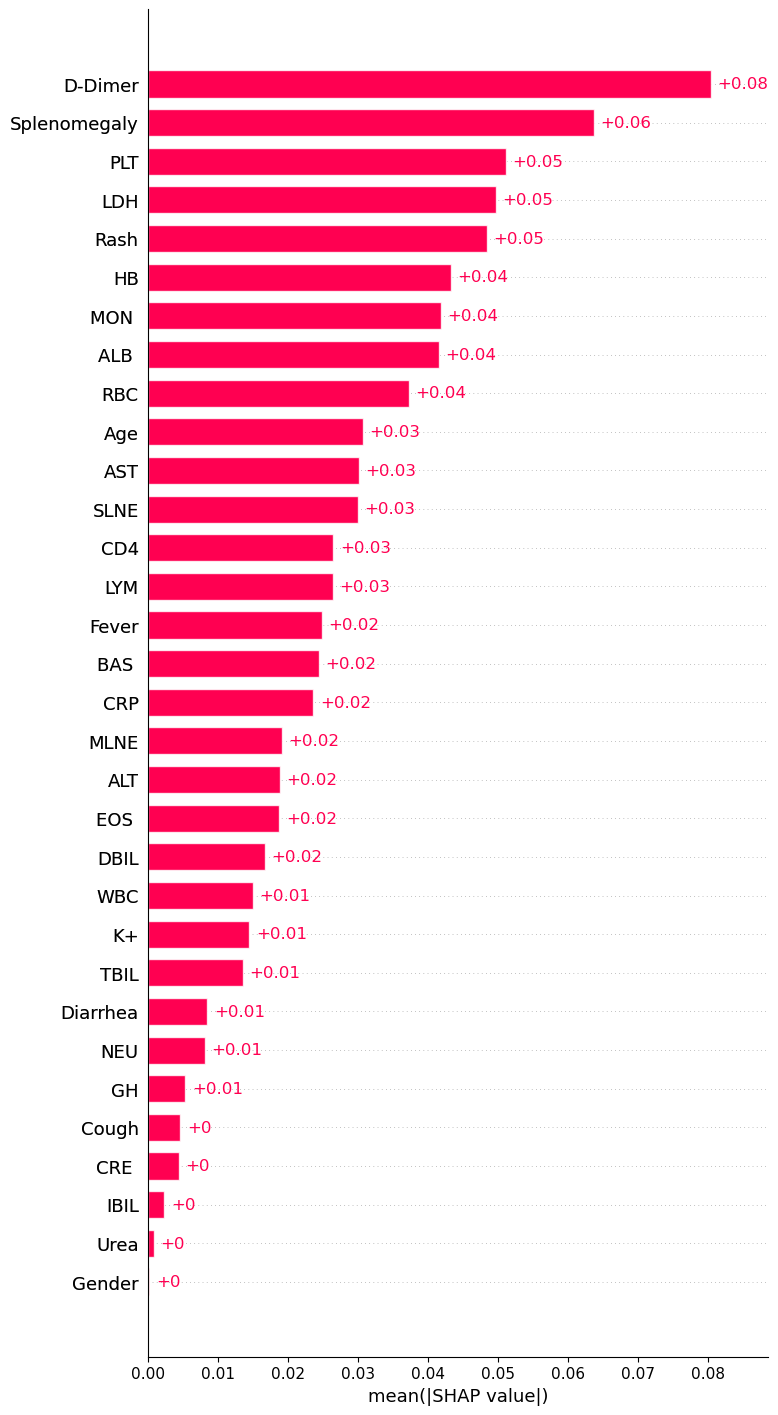

BernoulliNB已保存平均绝对值图数据


In [129]:
shap.plots.bar(shap_values, max_display=32, show=False)#max_display代表图表最大输出多少个项目

plt.savefig(f'./十七支队shap结果（浙一）/{model_name}/平均绝对值图.png', dpi=300)
#plt.savefig('./十七支队shap结果/BernoulliNB/bar_plot.svg')
plt.show()

# 保存数据
# 计算每个特征的绝对 SHAP 值的均值
shap_values_abs_mean = np.abs(shap_values.values).mean(axis=0)

# 获取特征名称
feature_names = x_train.columns

# 创建 DataFrame 来保存 SHAP 重要性
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'SHAP Importance': shap_values_abs_mean
})

# 按 SHAP 重要性排序
importance_df = importance_df.sort_values(by='SHAP Importance', ascending=False)

# 保存 SHAP 重要性到 Excel 文件
importance_df.to_excel(f'./十七支队shap结果（浙一）/{model_name}/平均绝对值图数据.xlsx', index=False)
print(f"{model_name}已保存平均绝对值图数据")

### force plot

In [48]:
shap.initjs()

In [49]:
force_plot = shap.plots.force(shap_values)
#shap.save_html('./十七支队shap结果/SVC/force_plot.html',force_plot)

In [50]:
shap.plots.force(shap_values[0])

### dependence scatter plot

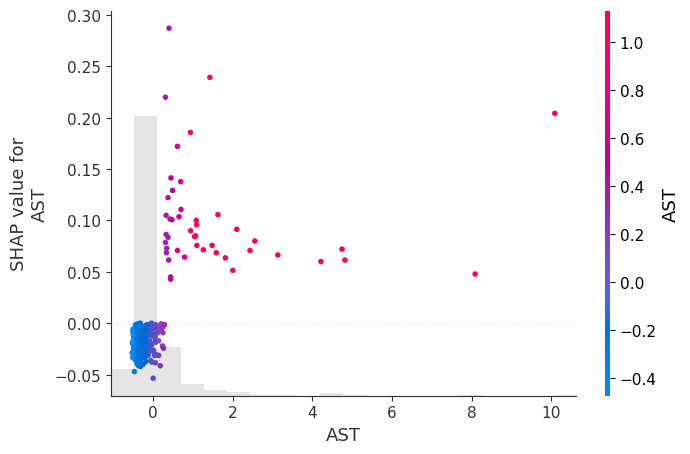

In [45]:
shap.plots.scatter(shap_values[:,20], color = shap_values[:, 20], show=False)
#plt.savefig('./十七支队shap结果/GradientBoostingClassifier/dependence_scatter_plot.png', dpi=300)
#plt.savefig('./十七支队shap结果/GradientBoostingClassifier/dependence_scatter_plot.svg')
plt.show()

### summary plot（beswam）

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


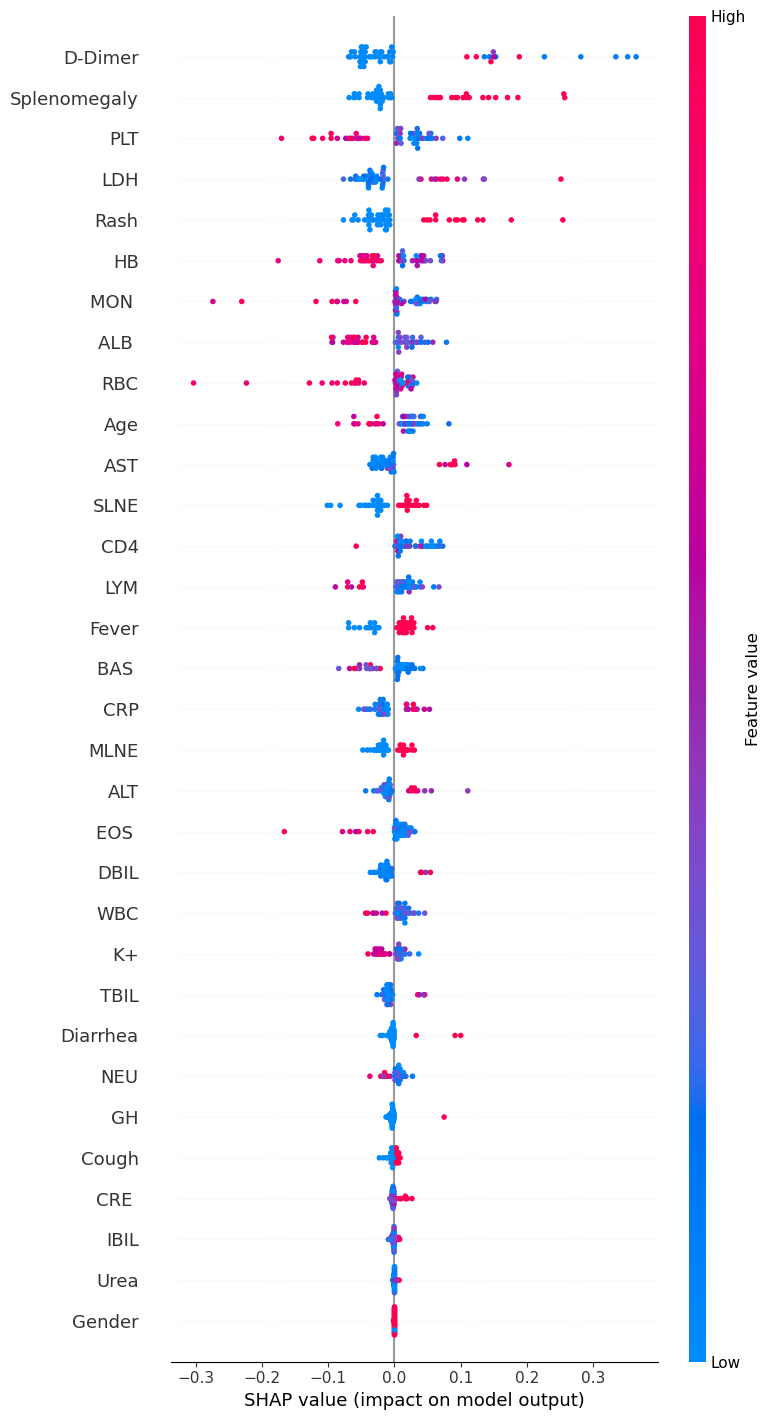

In [130]:
fig = plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, x_test_3, max_display=32, show=False)
plt.savefig(f'./十七支队shap结果（浙一）/{model_name}/散点图.png', dpi=300)
#plt.savefig('./十七支队shap结果/BernoulliNB/summary_plot.svg')
plt.show()

### heat map

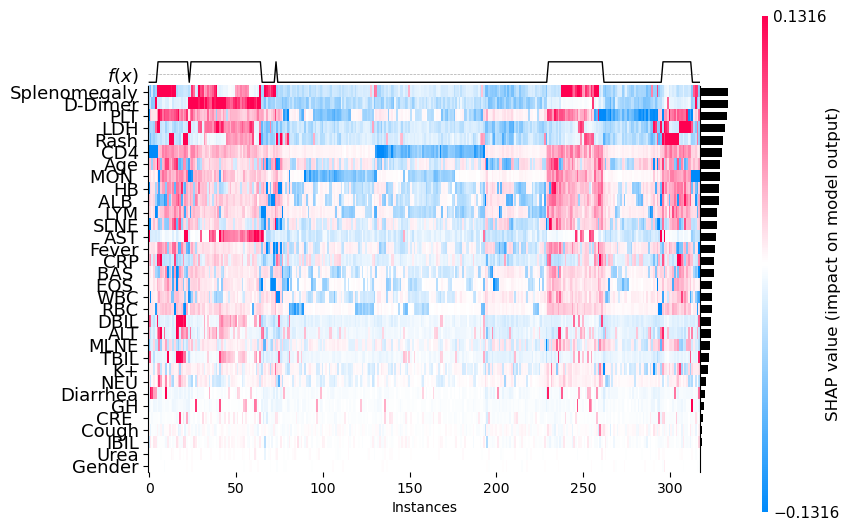

In [70]:
shap.plots.heatmap(shap_values, max_display=32, show = False)  # max_display 控制展示的特征数
# 保存为 PNG 格式，300 DPI
#plt.savefig('./十七支队shap结果/BernoulliNB/heatmap.png', dpi=300)

# 保存为 SVG 格式
#plt.savefig('./十七支队shap结果/BernoulliNB/heatmap.svg')
plt.show()

In [98]:
shap_values.values.max()

0.3842857142857143

In [74]:
order = pd.read_excel('./十七支队shap结果/BernoulliNB/shap_importance_abs_mean.xlsx')
order = order['Feature'].tolist()

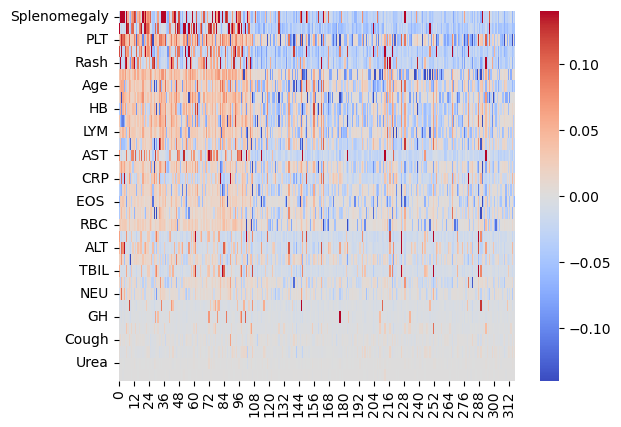

In [88]:
#plt.figure(figsize=(12, 16))
sns.heatmap(shap_df.T.reindex(index=order), cmap='coolwarm', annot=False, fmt='.2f', vmin=-0.14, vmax=0.14)
plt.savefig('heatmap.png', dpi=300)
plt.show()

### Interaction Summary Plot

In [132]:
explainer = shap.TreeExplainer(model.predict ,x_train, random_state=1)
shap_values = explainer(x_train)

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'method'>

In [129]:
shap_interaction_values = explainer.shap_interaction_values(x_train)
shap.summary_plot(shap_interaction_values, x_train, plot_type="interation")

AttributeError: 'Permutation' object has no attribute 'shap_interaction_values'

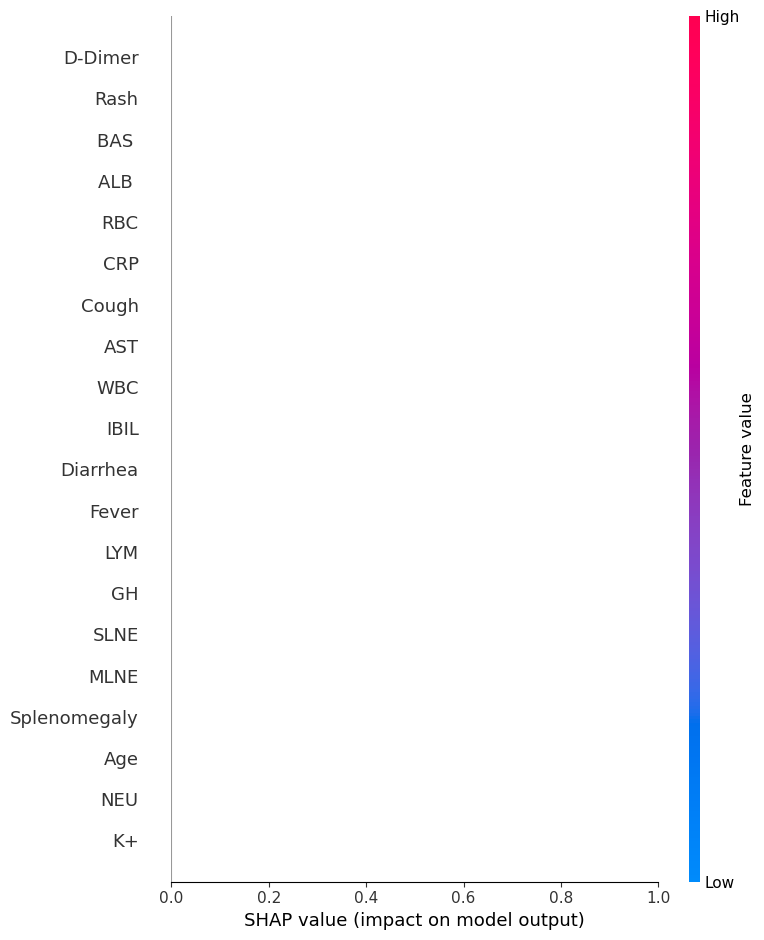

In [29]:
shap.summary_plot(interaction_matrix, x_train, plot_type="")

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 shap_values 是一个 numpy 数组，X_train 是特征矩阵
# Step 1: 计算交互效应矩阵
def compute_interactions(shap_values, x_train):
    n_features = x_train.shape[1]
    interaction_matrix = np.zeros((n_features, n_features))
    
    for i in range(n_features):
        for j in range(i + 1, n_features):
            # 计算两个特征 SHAP 值的交互效应，比如简单乘积
            interaction_matrix[i, j] = np.mean(np.abs(shap_values[:, i] * shap_values[:, j]))
            interaction_matrix[j, i] = interaction_matrix[i, j]
    
    return interaction_matrix

interaction_matrix = compute_interactions(shap_values, x_train)

# Step 2: 绘制交互效应热力图
plt.figure(figsize=(10, 8))
sns.heatmap(interaction_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            xticklabels=x_train.columns, yticklabels=x_train.columns)
plt.title("Feature Interaction Heatmap")
plt.show()


TypeError: bad operand type for abs(): 'Explanation'

In [28]:
interaction_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [124]:
# 假设 shap_values 是一个 Explanation 对象，提取 SHAP 值的数值部分
shap_values_array = shap_values.values  # 提取SHAP值为NumPy数组
x_train_array = x_train.values  # 确保x_train是NumPy数组

# Step 1: 计算交互效应矩阵
def compute_interactions(shap_values, x_train):
    n_features = x_train.shape[1]
    interaction_matrix = np.zeros((n_features, n_features))
    
    for i in range(n_features):
        for j in range(i + 1, n_features):
            # 计算两个特征 SHAP 值的交互效应
            interaction_matrix[i, j] = np.mean(np.abs(shap_values[:, i] * shap_values[:, j]))
            interaction_matrix[j, i] = interaction_matrix[i, j]
    
    return interaction_matrix

interaction_matrix = compute_interactions(shap_values_array, x_train_array)

In [125]:
interaction_matrix.min() #没有负值的？

0.0

In [126]:
# 计算 SHAP 值
#shap_values = explainer(X)

# 提取 SHAP 值
shap_values_array = shap_values.values

# 计算每对特征的 SHAP interaction values
def calculate_shap_interaction_values(shap_values_array):
    num_samples, num_features = shap_values_array.shape
    interaction_values = np.zeros((num_features, num_features))
    
    # 计算特征对的交互作用
    for i in range(num_features):
        for j in range(num_features):
            if i != j:
                # 计算 SHAP interaction value
                interaction_value = np.mean(
                    (shap_values_array[:, i] * shap_values_array[:, j] - shap_values_array[:, i]**2 - shap_values_array[:, j]**2)
                )
                interaction_values[i, j] = interaction_value
    
    return interaction_values

# 计算 SHAP interaction values
shap_interaction_values = calculate_shap_interaction_values(shap_values_array)

# 创建 DataFrame 查看结果
shap_interaction_df = pd.DataFrame(shap_interaction_values, columns=x_train.columns, index=x_train.columns)


In [127]:
shap_interaction_df.values.max() #为什么没有正的值？

0.0

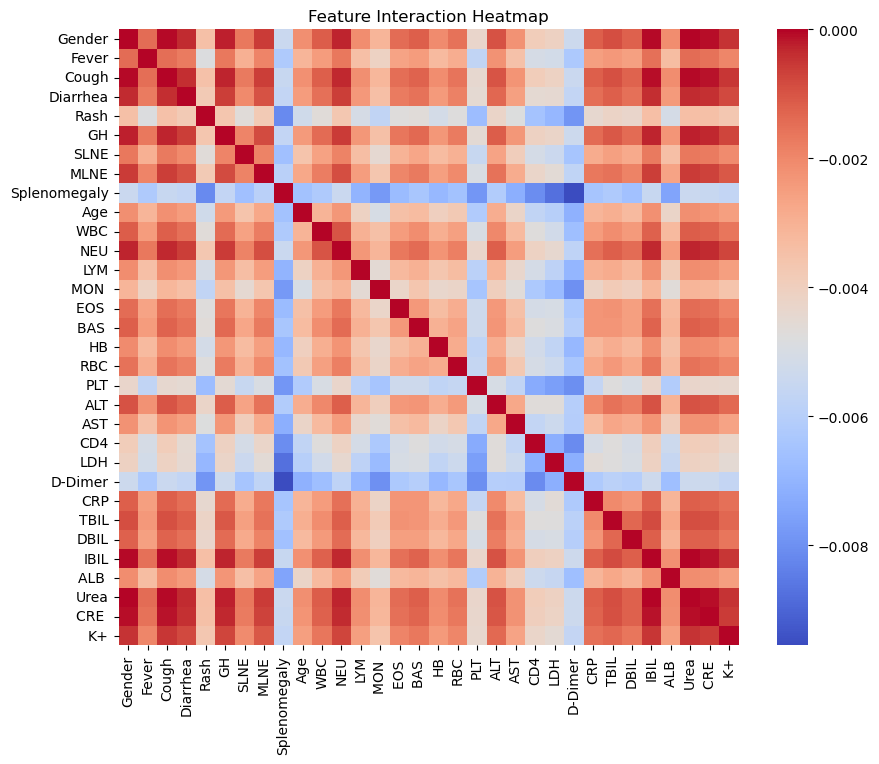

In [106]:
# Step 2: 绘制交互效应热力图
plt.figure(figsize=(10, 8))
sns.heatmap(shap_interaction_df, fmt=".2f", cmap="coolwarm", 
            xticklabels=x_train.columns, yticklabels=x_train.columns)
plt.title("Feature Interaction Heatmap")
plt.show()

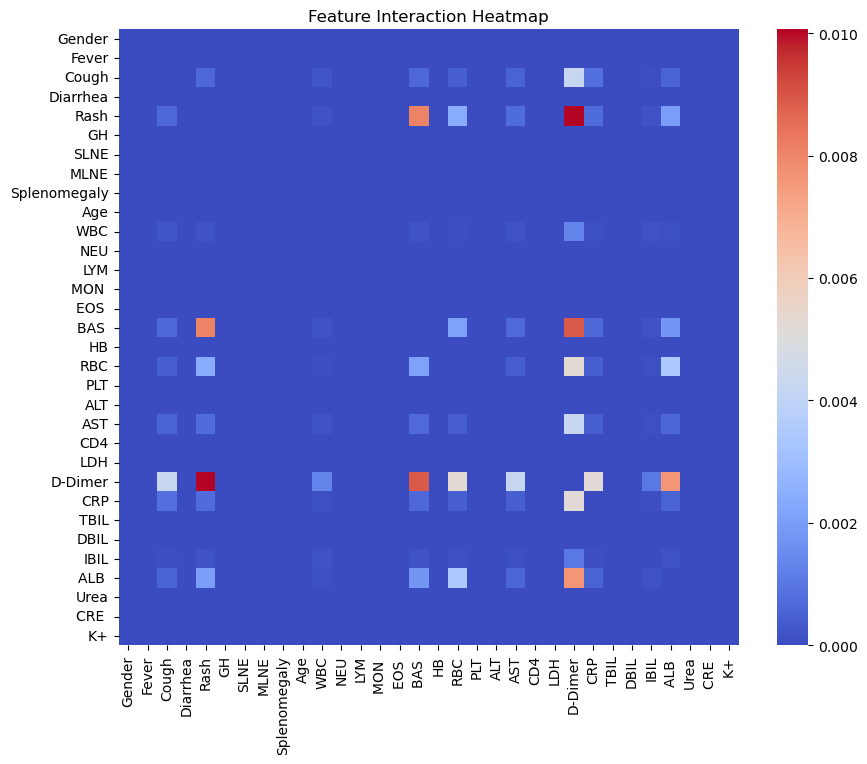

In [109]:
# Step 2: 绘制交互效应热力图
plt.figure(figsize=(10, 8))
sns.heatmap(interaction_matrix, fmt=".2f", cmap="coolwarm", 
            xticklabels=x_train.columns, yticklabels=x_train.columns)
plt.title("Feature Interaction Heatmap")
plt.show()

## PR曲线

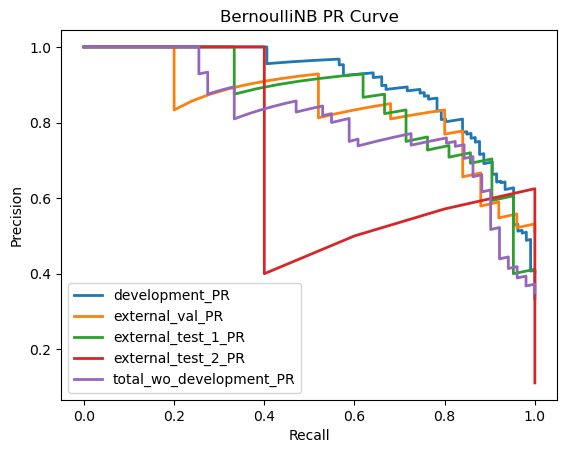

In [39]:
from sklearn.metrics import precision_recall_curve

# 计算 Precision-Recall 曲线及其对应的阈值）
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_pred)
precision_test_1, recall_test_1, thresholds_test_1 = precision_recall_curve(y_test_1, y_pred_1)
precision_test_2, recall_test_2, thresholds_test_2 = precision_recall_curve(y_test_2, y_pred_2)
precision_test_3, recall_test_3, thresholds_test_3 = precision_recall_curve(y_test_3, y_pred_3)
precision_test_5, recall_test_5, thresholds_test_5 = precision_recall_curve(y_test_5, y_pred_5)

# 绘制PR曲线函数
def plot_pr_curve(precision, recall, label):
    plt.plot(recall, precision, lw=2, label=label)

# 绘制PR曲线
plt.figure()
plot_pr_curve(precision_train, recall_train, 'development_PR')
plot_pr_curve(precision_test_2, recall_test_2, 'external_val_PR')
plot_pr_curve(precision_test_3, recall_test_3, 'external_test_1_PR')
plot_pr_curve(precision_test_1, recall_test_1, 'external_test_2_PR')
plot_pr_curve(precision_test_5, recall_test_5, 'total_wo_development_PR')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('BernoulliNB PR Curve') #修改名称
plt.legend(loc="lower left")

# 保存图像到文件夹
plt.savefig('./output/PR曲线及其数据/图片/BernoulliNB.png') #修改名称
plt.show()

# 将 Precision、Recall 和阈值保存为 Excel
pr_data_train = pd.DataFrame({
    #'Threshold': np.append(thresholds_train, 1),  # thresholds 数量少一个，补齐
    'Precision': precision_train,
    'Recall': recall_train
})

pr_data_test_1 = pd.DataFrame({
    #'Threshold': np.append(thresholds_test_1, 1),
    'Precision': precision_test_1,
    'Recall': recall_test_1
})

pr_data_test_2 = pd.DataFrame({
    #'Threshold': np.append(thresholds_test_2, 1),
    'Precision': precision_test_2,
    'Recall': recall_test_2
})

pr_data_test_3 = pd.DataFrame({
   # 'Threshold': np.append(thresholds_test_3, 1),
    'Precision': precision_test_3,
    'Recall': recall_test_3
})

pr_data_test_5 = pd.DataFrame({
    #'Threshold': np.append(thresholds_test_5, 1),
    'Precision': precision_test_5,
    'Recall': recall_test_5
})

# 将不同数据集的 PR 曲线坐标保存到 Excel 文件的不同 sheet
with pd.ExcelWriter('./output/PR曲线及其数据/数据/BernoulliNB.xlsx') as writer: #修改名称
    pr_data_train.to_excel(writer, sheet_name='development_PR', index=False)
    pr_data_test_2.to_excel(writer, sheet_name='external_val_PR', index=False)
    pr_data_test_3.to_excel(writer, sheet_name='external_test_1_PR', index=False)
    pr_data_test_1.to_excel(writer, sheet_name='external_test_2_PR', index=False)
    pr_data_test_5.to_excel(writer, sheet_name='total_wo_development_PR', index=False)


## ROC曲线

In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve

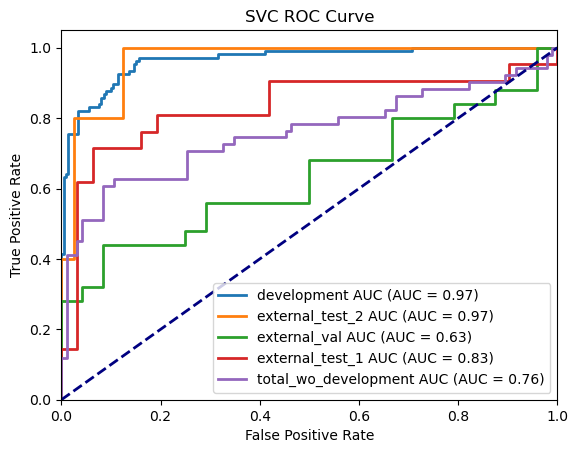

In [29]:
# 绘制ROC曲线函数
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

# 计算ROC曲线和AUC
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred)
fpr_test_1, tpr_test_1, _ = roc_curve(y_test_1, y_pred_1)
fpr_test_2, tpr_test_2, _ = roc_curve(y_test_2, y_pred_2)
fpr_test_3, tpr_test_3, _ = roc_curve(y_test_3, y_pred_3)
fpr_test_5, tpr_test_5, _ = roc_curve(y_test_5, y_pred_5)

# 保存ROC坐标到Excel
df_roc_train = pd.DataFrame({'FPR': fpr_train, 'TPR': tpr_train})
df_roc_test_1 = pd.DataFrame({'FPR': fpr_test_1, 'TPR': tpr_test_1})
df_roc_test_2 = pd.DataFrame({'FPR': fpr_test_2, 'TPR': tpr_test_2})
df_roc_test_3 = pd.DataFrame({'FPR': fpr_test_3, 'TPR': tpr_test_3})
df_roc_test_5 = pd.DataFrame({'FPR': fpr_test_5, 'TPR': tpr_test_5})

with pd.ExcelWriter('./output/ROC曲线及其坐标/坐标/SVC.xlsx') as writer: #修改文件名
    df_roc_train.to_excel(writer, sheet_name='development_ROC', index=False)
    df_roc_test_1.to_excel(writer, sheet_name='external_test_2_ROC', index=False)
    df_roc_test_2.to_excel(writer, sheet_name='external_val_ROC', index=False)
    df_roc_test_3.to_excel(writer, sheet_name='external_test_1_ROC', index=False)
    df_roc_test_5.to_excel(writer, sheet_name='total_wo_development_ROC', index=False)

# 绘制ROC曲线
plt.figure()
plot_roc_curve(fpr_train, tpr_train, auc_train, 'development AUC')
plot_roc_curve(fpr_test_1, tpr_test_1, auc_1, 'external_test_2 AUC')
plot_roc_curve(fpr_test_2, tpr_test_2, auc_2, 'external_val AUC')
plot_roc_curve(fpr_test_3, tpr_test_3, auc_3, 'external_test_1 AUC')
plot_roc_curve(fpr_test_5, tpr_test_5, auc_5, 'total_wo_development AUC')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve')  # 修改标题
plt.legend(loc="lower right")

# 保存图像到output文件夹

plt.savefig(os.path.join('./output/ROC曲线及其坐标/图片', 'SVC.png'))  # 修改文件名

# 显示图像
plt.show()

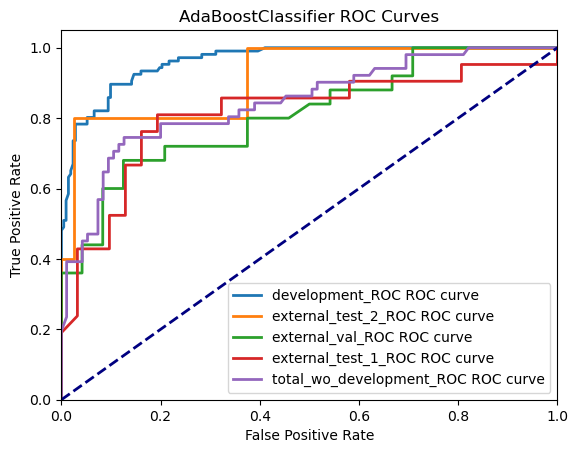

In [9]:
# Excel文件路径
file_path = './output/ROC曲线及其坐标/坐标/AdaBoostClassifier.xlsx'  # 替换为你的Excel文件路径

# 获取所有sheet的名称
sheets = pd.ExcelFile(file_path).sheet_names

# 创建绘图
plt.figure()

# 遍历每个Sheet，读取FPR和TPR并绘制ROC曲线
for sheet_name in sheets:
    # 读取每个Sheet的数据
    roc_data = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # 假设FPR在第一列，TPR在第二列
    fpr = roc_data.iloc[:, 0]
    tpr = roc_data.iloc[:, 1]
    
    # 绘制ROC曲线
    plt.plot(fpr, tpr, lw=2, label=f'{sheet_name} ROC curve')

# 添加对角线（参考线）
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# 设置坐标轴范围
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# 添加标签和标题
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoostClassifier ROC Curves')

# 显示图例
plt.legend(loc="lower right")

# 显示图像
plt.show()
